Exercise in section 2.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lqfn.quantum_systems import NonRelativisticSingleParticle1D

In [2]:
a = 1/2
N = 8
E_0 = 1/2

In [3]:
x_exact = np.linspace(-2.0, 2.0, 100)
x_pimc = np.linspace(-2.0, 2.0, 20)

# Harmonic oscillator

In [4]:
def V_harmonic_oscillator(x: float):
    return x**2 / 2

def psi_ground(x: float):
    return np.exp(-x**2 / 2) / np.pi**(1/4)

In [5]:
harmonic_oscillator = NonRelativisticSingleParticle1D(V=V_harmonic_oscillator, T=N*a, N=N)

In [6]:
propagators_exact = harmonic_oscillator.compute_propagator_from_ground_state(x_exact, ground_energy=E_0, ground_wavefunction=psi_ground)
propagators_pimc_results = harmonic_oscillator.compute_propagator_pimc(x_pimc)
propagators_pimc = np.array([ p.mean for p in propagators_pimc_results ])

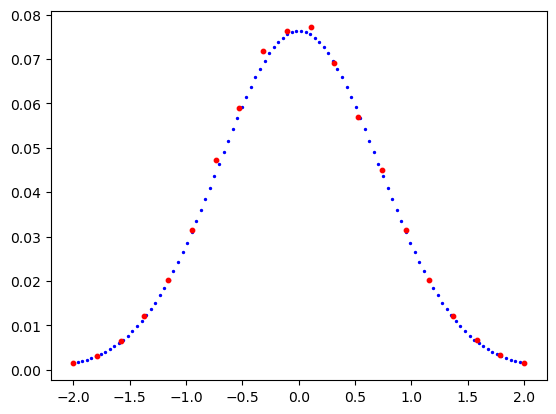

In [7]:
plt.scatter(x_exact, propagators_exact, s=2, color='blue')
plt.scatter(x_pimc, propagators_pimc, s=10, color='red')
plt.show()

In [8]:
for result in propagators_pimc_results:
    print(result.Q)

0.2785447867656998
0.1039167960088848
0.4204343054645059
0.3848477175645123
0.007665004152098685
0.33681996867234343
0.9700433301370763
0.8577751536127212
0.8344315315169744
0.09467497849376721
0.5344482943555461
0.11601266467255404
0.7699811681395855
0.34913633336478134
0.05915168873367699
0.9766397522856145
0.24321332775745455
0.6853252116032041
0.6898192373304121
0.9440559069378297


If all Qs are greater than $0.05$, it means that all points are statistically significant. 

# TODO:
- Output the goodness of the integration procedures
- Compare quantitatively Monte Carlo vs exact

# Potential $x^4/2$

In [9]:
def V_x4(x: float):
    return x ** 4 / 2

In [10]:
x4_system = NonRelativisticSingleParticle1D(V=V_x4, T=4, N=8)

In [11]:
propagators_exact = x4_system.compute_propagator_from_ground_state(x_exact)
propagators_pimc_results = x4_system.compute_propagator_pimc(x_pimc, lower_bound=-4, upper_bound=4, neval=10000)
propagators_pimc = np.array([ p.mean for p in propagators_pimc_results ])

Computing...
Took 0.031144380569458008


In [12]:
for result in propagators_pimc_results:
    print(result.Q)

0.6457357544932585
0.594495338378924
0.07218393694474805
0.27109328232636154
0.7768262623886261
0.8146347476339628
0.19079439807641102
0.7993957240417305
0.270010563484734
0.6981269870693542
0.3290168452756423
0.04100148778825851
0.7209898267179735
0.8908182975740093
0.6356899198702004
0.7628474710452247
0.1354660606554458
0.02221254662224864
0.764705945168961
0.14629447018188962


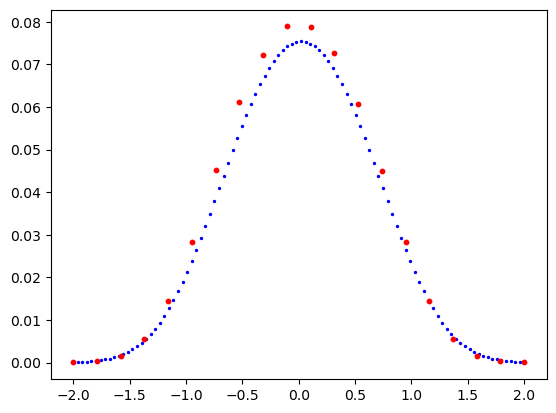

In [13]:
plt.scatter(x_exact, propagators_exact, s=2, color='blue')
plt.scatter(x_pimc, propagators_pimc, s=10, color='red')
plt.show()